In [1]:
'''
Here we import important functions for this project.
'''
%run jtt2017_prospect_helpers.py
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

## PART 1. Evaluating Risk and Value when Studying for Tests

Here, we are going to evaluate your team members' risk and reward profiles for a scenario you are all familiar with: studying for tests in school. Imagine that you and your partner(s) are getting ready for a big test in your most/least favorite class. We want to compare your tolerances for risk when preparing for this test.

### A: What type of test is your team considering?

When told, take a moment and discuss with your team which test you will be considering here. Agree on a class, a teacher, and the material that would be on this test. This could be a test you all took recently, or a final you all remember being particularly difficult.

### B: What are the answers to your "lottery questions?"

Once your "test" details are decided, we need to consider the lottery questions to answer. Here, the questions are posed as **certainty equivalence lottery questions**: they pose a choice between a lottery (a chance at a good and bad outcome) or a certainty event (you get a third outcome for sure).

In this scenario, we will consider choices between:

-  a *lottery* where there is a probability $p$ of getting a 100% on the test and a probability $1-p$ of getting a 40% on the test, and
-  a *certainty* of getting a score $X$, as if the teacher agreed that this score matches what they would expect.

**Your Task:** For each of four such decisions, determine what certain score, $X$, would make the decision between the lottery and the certain score a toss up: both options seem about equal to you. The four decisions are:

- 1) A 20% chance at a 100%, and a 80% chance at a 40%, or a score of $X$.
- 2) A 40% chance at a 100%, and a 60% chance at a 40%, or a score of $X$.
- 3) A 60% chance at a 100%, and a 40% chance at a 40%, or a score of $X$.
- 4) A 80% chance at a 100%, and a 20% chance at a 40%, or a score of $X$.

On your index card, write numbers (1) through (4) down, and for each decision above, write the certain score of $X$ on the test that would make each option about equal in preference. DO NOT DISCUSS YOUR ANSWERS WITH YOUR PARTNER(S), this is an individual decision and there are no wrong answers.

### C: Input your responses below and compare your value and risk profiles to your partner(s).

In the cell below, replace 'MyNameHere' with one of your partner(s) names, and put their responses to the lottery questions in order in the "response" row below that name. Repeat for each of your partners for Name1 - Name4. If you need help, ask!

In [2]:
responses = []

# for each of your team members, put your responses to the lottery questions in the corresponding places:

Name1 = 'Adam' # select the text here and put the first team member's name
response = [ '50', '60', '70', '85' ]
response.append(Name1)
responses.append(response)

Name2 = 'Alyssa'
response = [ '48', '55', '65', '80' ]
response.append(Name2)
responses.append(response)

Name3 = 'Ferko'
response = [ '55', '70', '80', '92' ]
response.append(Name3)
responses.append(response)

Name4 = 'MyNameHere'
response = [ 'NUM1', 'NUM2', 'NUM3', 'NUM4' ]
response.append(Name4)
responses.append(response)

for r in responses:
    print(r)

['50', '60', '70', '85', 'Adam']
['48', '55', '65', '80', 'Alyssa']
['55', '70', '80', '92', 'Ferko']
['NUM1', 'NUM2', 'NUM3', 'NUM4', 'MyNameHere']


(array([  40.,   55.,   70.,   80.,   92.,  100.]), 'Ferko')
(array([  40.,   50.,   60.,   70.,   85.,  100.]), 'Adam')
(array([  40.,   48.,   55.,   65.,   80.,  100.]), 'Alyssa')


C:\Users\adach\Anaconda2\Lib\site-packages\scipy\optimize\minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


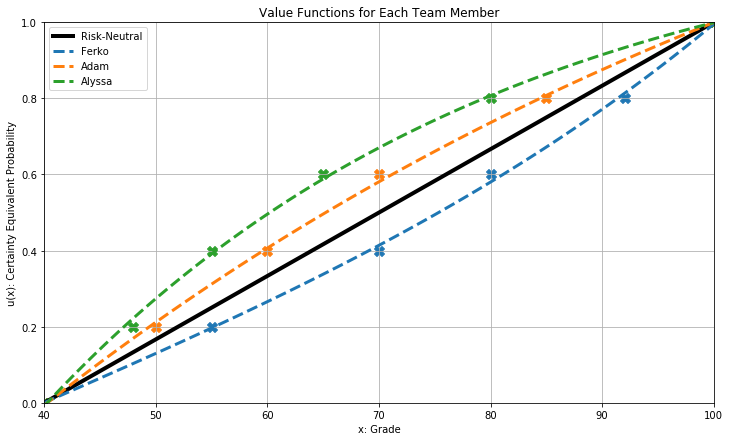

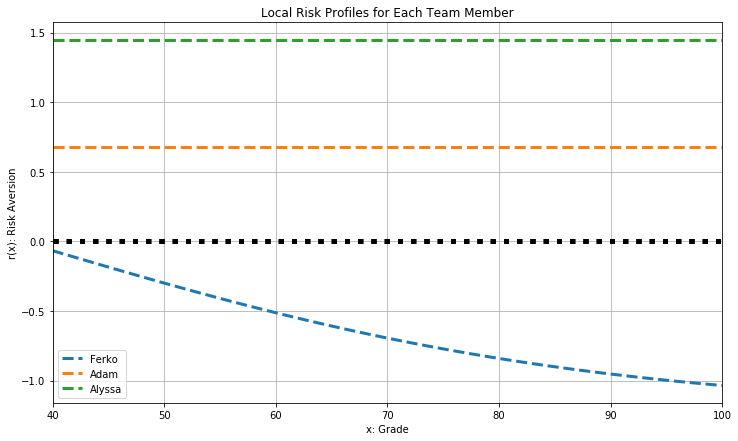

In [3]:
# get the data formatted correctly
nameList = [Name1, Name2, Name3, Name4]
teamData = getTeamData(nameList, responses)

for key in teamData.keys():
    if key != 'Y':
        print(teamData[key], key)
        
# and plot everything!
plotNiceGraphs(teamData)

## PART 2. Build Your Own Model!

Now, take a moment with your team and try to come up with another decision scenario you could model using this approach. Let's break the problem down to build the scenario...

### A: Determine the Scenario.

First we need to come up with a decision scenario. We need a few things to make this work:
- A **best case scenario.** In the last example, this was a 100% on the test.
- A **worst case scenario.** In the last example, this was a 40% on the test.
- A **range of other scenarios** between these best and worst cases. In the last example, these were the certain grades $X$ you could have gotten.

Examples for such a scenario could be...
- how long you need to work to buy something you want (best case = 0 hours, worst case = 10 or so hours, $X$ = some amounts of time in between)
- how long you need to play Star Wars Battlefront II to unlock Darth Vader (best case = 0 hours, worst case = 40 or so hours, $X$ = some amounts of time in between)
- how far your car will drive before it breaks down (best case = 300,000 miles, worst case = 50,000 or so miles, $X$ = some amounts of miles in between)

... Or any other scenario you can think of.

Write down a brief description of your scenario, and your best-case, worst-case, and possible range of scenarios.

### B: Determine the "Lottery Questions."

**Your Task:** For each of four such decisions, determine what certain scenario, $X$, would make the decision between the lottery and the certain scenario a toss up: both options seem about equal to you. The four decisions are:

- 1) A 20% chance at the **best case**, and a 80% chance at the **worst case**, or a scenario of $X$.
- 2) A 40% chance at the **best case**, and a 60% chance at the **worst case**, or a scenario of $X$.
- 3) A 60% chance at the **best case**, and a 40% chance at the **worst case**, or a scenario of $X$.
- 4) A 80% chance at the **best case**, and a 20% chance at the **worst case**, or a scenario of $X$.

### C: Get Responses for each of your partners, OR get the responses of another group.

Pose these questions either to your group members or to members of another group, and input the names and responses below like last time. Also, put the **best case** and **worst case** values for your decision scenarios in the correct lines in the cell below as well. 

Ask if you need help!

In [4]:
# input the BEST CASE scenario value here...
BEST_CASE = '50'
# input the WORST CASE scenario value here...
WORST_CASE = '100'

responses = []

# for each of your team members, put your responses to the lottery questions in the corresponding places:

Name1 = 'Adam' # select the text here and put the first team member's name
response = [ '93', '87', '72', '65' ]
response.append(Name1)
responses.append(response)

Name2 = 'Alyssa'
response = [ '91', '85', '71', '62' ]
response.append(Name2)
responses.append(response)

Name3 = 'MyNameHere'
response = [ 'NUM1', 'NUM2', 'NUM3', 'NUM4' ]
response.append(Name3)
responses.append(response)

Name4 = 'MyNameHere'
response = [ 'NUM1', 'NUM2', 'NUM3', 'NUM4' ]
response.append(Name4)
responses.append(response)

for r in responses:
    print(r)

['93', '87', '72', '65', 'Adam']
['91', '85', '71', '62', 'Alyssa']
['NUM1', 'NUM2', 'NUM3', 'NUM4', 'MyNameHere']
['NUM1', 'NUM2', 'NUM3', 'NUM4', 'MyNameHere']


(array([ 100.,   93.,   87.,   72.,   65.,   50.]), 'Adam')
(array([ 100.,   91.,   85.,   71.,   62.,   50.]), 'Alyssa')


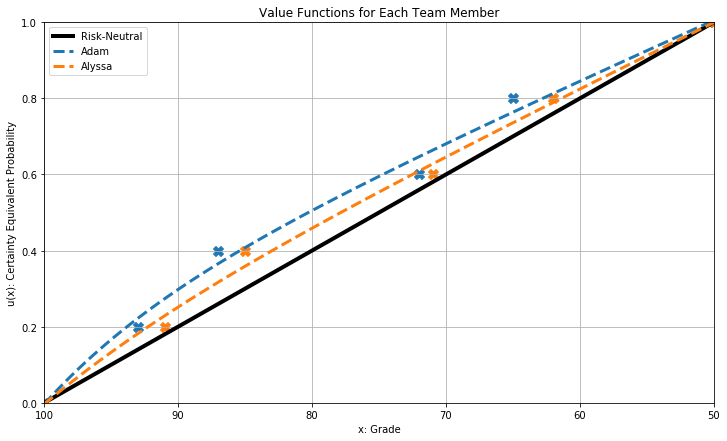

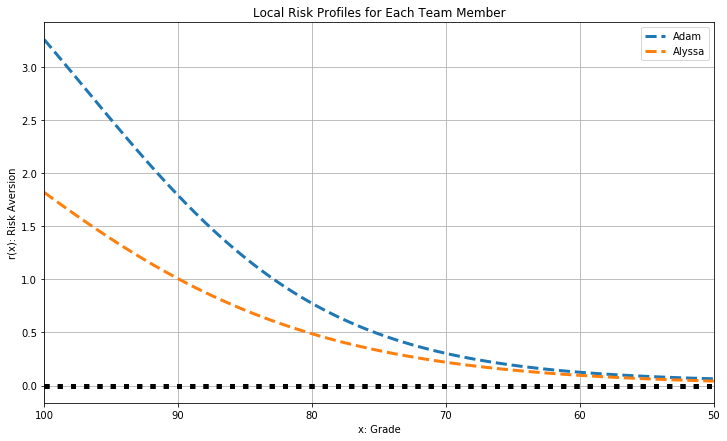

In [5]:
# get the data formatted correctly
nameList = [Name1, Name2, Name3, Name4]
teamData = getTeamData(nameList, responses,
                       minGrade = float(WORST_CASE),
                       maxGrade = float(BEST_CASE))

for key in teamData.keys():
    if key != 'Y':
        print(teamData[key], key)
        
# and plot everything!
plotNiceGraphs(teamData,
              minGrade = float(WORST_CASE),
              maxGrade = float(BEST_CASE))

In [6]:
# # fit the value functions to the data we have:

# plt.figure(figsize=(12,7))
# initplt = True
# teamData['rx'] = {}

# for name in teamData.keys():
# #     print name
#     if name != 'Y' and name != 'rx':
        
#         Y = teamData['Y']
#         X = teamData[name]
#         minX = min(X)
#         minY = min(Y)
#         maxX = max(X)
#         maxY = max(Y)
#         # check if the current team member is risk prone or risk averse...
        
#         # get the team member's data and normalize it...
#         xNormed = normalizeArray(teamData[name])
#         yNormed = normalizeArray(teamData['Y'])
#         # fit the utility function...
# #         print xNormed[2][1:-1], yNormed[2]
        
#         # try the first functional form
#         try:
#             print('getting the value function for', name,'...')
#             func = utility_form1
#             rType = 1
#             params = fitUtilityFunction(xNormed[2], yNormed[2], func)
#         except RuntimeError:
#             try:
#                 print('...trying risk prone value function instead...')
#                 func = utility_form2
#                 rType = 2
#                 params = fitUtilityFunction(xNormed[2], yNormed[2], func)
#             except RuntimeError:
#                 print('...still getting an error. Ask for help!')
#         y_2normed = func(np.linspace(0,1,100),
#                          params[0],
#                          params[1],
#                          params[2],
#                          params[3],
#                          params[4]
#                         )
#         r = rx(np.linspace(0,1,100),
#                params[0],
#                params[1],
#                params[2],
#                params[3],
#                params[4],
#                rType
#               )
#         teamData['rx'][name] = r
#         y2 = deNormalizeArray(yNormed[0],yNormed[1],y_2normed)
#         x2 = deNormalizeArray(xNormed[0],xNormed[1],np.linspace(0,1,100))
#         if initplt == True:
#             plt.plot([minX,maxX],[minY,maxY],linestyle='-',c='k',linewidth=4,label='Risk-Neutral')
#             initplt = False
# #         plt.plot(x2,y2,linestyle="--",linewidth=3,label=name)
#         p = plt.plot(x2,y2,linestyle="--",linewidth=3,label=name)
#         co = p[0].get_color()
#         plt.scatter(teamData[name],teamData['Y'],c=co, s=100, marker='X')
# plt.legend(loc='best')
# plt.grid()
# plt.ylabel('u(x): Certainty Equivalent Probability')
# plt.xlabel('x: Grade')
# plt.xlim([50,100])
# plt.ylim([0,1])
# plt.show()

In [7]:
# plt.figure(figsize=(12,7))
# for name in teamData.keys():
#     if name != 'Y' and name != 'rx':
#         plt.plot(np.linspace(50,100,len(teamData['rx'][name])),
#                  np.zeros(len(teamData['rx'][name])),
#          linestyle=":",linewidth=5,c='k')
#         plt.plot(np.linspace(50,100,len(teamData['rx'][name])),
#                  teamData['rx'][name],
#                  linestyle="--",linewidth=3,label=name)
        
# plt.legend(loc='best')
# plt.grid()
# plt.ylabel('r(x): Risk Aversion')
# plt.xlabel('x: Grade')
# plt.xlim([50,100])
# # plt.ylim([0,1])
# plt.show()

In [8]:
# def getTeamData(nameList, responses, 
#                minGrade = 50., 
#                maxGrade = 100., 
#                datapoints = 6): 
#     teamData = {}
#     teamData['Y'] = np.linspace(0., 1., datapoints)
#     for name in nameList:
#         if 'myname' not in name.lower():
#             for r in responses:
#                 if r[-1] == name:
#                     data = r[:-1]
#             a = np.array([ float(point) for point in data ])
#             a = np.insert(a,0,50.) # 0 hours for the first outcome 
#             a = np.insert(a,len(a),100.) # 0 hours for the last outcome 
#             teamData[name] = a
#             teamData['Y'] = np.linspace(0., 1., len(a))
#     return teamData

# minGrade = 50. # the minimum grade we are considering
# maxGrade = 100. # the maximum grade we are considering

# teamData['Y'] = np.linspace(0., 1., 6)

# for name in nameList:
#     if 'myname' not in name.lower():
#         for r in responses:
#             if r[-1] == name:
#                 data = r[:-1]
#         a = np.array([ float(point) for point in data ])
#         a = np.insert(a,0,50.) # 0 hours for the first outcome 
#         a = np.insert(a,len(a),100.) # 0 hours for the last outcome 
#         teamData[name] = a
#         teamData['Y'] = np.linspace(0., 1., len(a))

In [9]:

# from jtt2017_prospect_helpers import *

# # define a function to normalize an input array
# def normalizeArray(X):
#     minX = min(X)
#     maxX = max(X)
#     normed = np.array( [(x-minX)/(maxX-minX) for x in X] )
# #     print normed
#     return [minX, maxX, normed]

# # transform the normed array back into the original array
# def deNormalizeArray(minX, maxX, X):
#     denormed = np.array( [ x*(maxX-minX)+minX for x in X ] )
# #     print denormed
#     return denormed

# def rx(x,h,k,a,b,c,rType):
#     if rType == 1:
#         return (a*a*np.exp(-a*x) + b*c*c*np.exp(-c*x)) / (a*np.exp(-a*x) + b*c*np.exp(-c*x))
#     elif rType == 2:
#         return (k*a*a*np.exp(-a*x) + b*c*c*np.exp(-c*x)) / (k*a*np.exp(-a*x) + b*c*np.exp(-c*x))
#     else:
#         print('check r(x) type')
#         return

# # risk aversion...
# def utility_form1(x,h,k,a,b,c):
#     ux = h-k*(np.exp(-a*x)+b*np.exp(-c*x))
# #     def rx(x,h,k,a,b,c):
# #         return (a*a*np.exp(-a*x) + b*c*c*np.exp(-c*x)) / (a*np.exp(-a*x) + b*c*np.exp(-c*x))
#     return ux

# # risk proneness...
# def utility_form2(x,h,k,a,b,c):
#     ux = k*np.exp(-a*x)+b*np.exp(-c*x)
# #     def rx(x,k,a,b,c,h):
# #         return (k*a*a*np.exp(-a*x) + b*c*c*np.exp(-c*x)) / (k*a*np.exp(-a*x) + b*c*np.exp(-c*x))
#     return ux

# # define a function to fit the utility functional form to a given, normalized X,Y data pair
# def fitUtilityFunction(X,Y,func):
# #     def utility_form(x,h,k,a,b,c):
# #         return h-k*(np.exp(-a*x)+b*np.exp(-c*x))
#     curve_opt, curve_cov = curve_fit(func,X,Y,
#                                      maxfev=20000) # fit the observed data
#     print(curve_opt)
#     return curve_opt